In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
count = 0
import os
for dirname, _, filenames in os.walk('/home/dafahan/Downloads/makanan'):
    for filename in filenames:
        #count+=1
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/images (28)(2).jpg
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/images (26).jpg
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/images (15).jpg
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/images (21).jpg
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/d970af90f97fe8e057a0bc5a5d4fbd1b.jpg
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/images (35).jpg
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/images (18).jpg
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/4e6b5e0fda6c62b9eb5106ad6b084146.jpg
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/images (8).jpg
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/c61e2f08336f117975fb3d49a0723bbd.jpg
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/images (11)(1).jpg
/home/dafahan/Downloads/makanan/train/Ikan Gurame Asam Manis/images.jpg
/home/dafahan

In [3]:

from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)

2.16.1


In [4]:
# Create a list with the filepaths for training and testing
train_dir = Path('../../../Downloads/makanan/train/')
train_jpg = list(train_dir.glob(r'**/*.jpg'))
train_JPG = list(train_dir.glob(r'**/*.JPG'))
train_jpeg = list(train_dir.glob(r'**/*.jpeg'))
train_filepaths = train_jpg+train_jpeg+train_JPG

In [5]:
test_dir = Path('../../../Downloads/makanan/test/')
test_jpg = list(test_dir.glob(r'**/*.jpg'))
test_JPG = list(test_dir.glob(r'**/*.JPG'))
test_jpeg = list(test_dir.glob(r'**/*.jpeg'))
test_filepaths = test_jpg + test_jpeg + test_JPG

In [6]:
val_dir = Path('../../../Downloads/makanan/validation/')
val_jpg = list(test_dir.glob(r'**/*.jpg'))
val_JPG = list(test_dir.glob(r'**/*.JPG'))
val_jpeg = list(test_dir.glob(r'**/*.jpeg'))
val_filepaths = val_jpg + val_jpeg+val_JPG

In [8]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [9]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [10]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 8766

Number of different labels: 109

Labels: ['Dadar Gulung (2 lapis)' 'Es Teler' 'Soda' 'Kopi Americano'
 'Es Teh Manis' 'Bakpia' 'Cumi Goreng' 'Rawon' 'Mie Ayam' 'Dimsum'
 'Soto ayam' 'Gado-gado' 'Salad Buah' 'Martabak Keju' 'Sop buah'
 'Roti Isi Coklat' 'Pizza Keju' 'Es Podeng' 'Lumpia Basah' 'Burger'
 'Es Krim Strawberry' 'Perkedel Jagung' 'Sate Ayam' 'Nasi Goreng'
 'Jus Jeruk' 'Es Kacang Merah' 'Keripik Kentang' 'Lasagna' 'Ayam Geprek'
 'Oatmeal Ubi Jalar' 'Es Dawet' 'Risol Bihun' 'Kentang Goreng'
 'Es Jeruk Peras' 'Milk Shake' 'Tahu isi' 'Kopi Latte' 'Es Doger'
 'Es Kopi' 'Lapis Legit (1 potong)' 'Susu coklat' 'Telur goreng'
 'Nasi Hainan' 'Rendang' 'Es Krim Vanila' 'Mochi' 'Pecel Lele' 'Spaghetti'
 'Nasi Uduk' 'Ramen Ayam' 'Gelato' 'Telur rebus' 'Nagasari'
 'Greek Yoghurt dengan Buah & Granola' 'Belgian Waffle' 'Udang goreng'
 'Puding Coklat' 'Risol Mayo' 'Mie Kocok' 'Es Kelapa Muda' 'Jus Apel'
 'Cendol' 'Pisang Goreng Madu' 'Cappucino' 

In [11]:
train_df.head(5)


,Filepath,Label
0,../../../Downloads/makanan/train/Dadar Gulung ...,Dadar Gulung (2 lapis)
1,../../../Downloads/makanan/train/Es Teler/IMG_...,Es Teler
2,../../../Downloads/makanan/train/Soda/th (5)(1...,Soda
3,../../../Downloads/makanan/train/Kopi American...,Kopi Americano
4,../../../Downloads/makanan/train/Es Teh Manis/...,Es Teh Manis


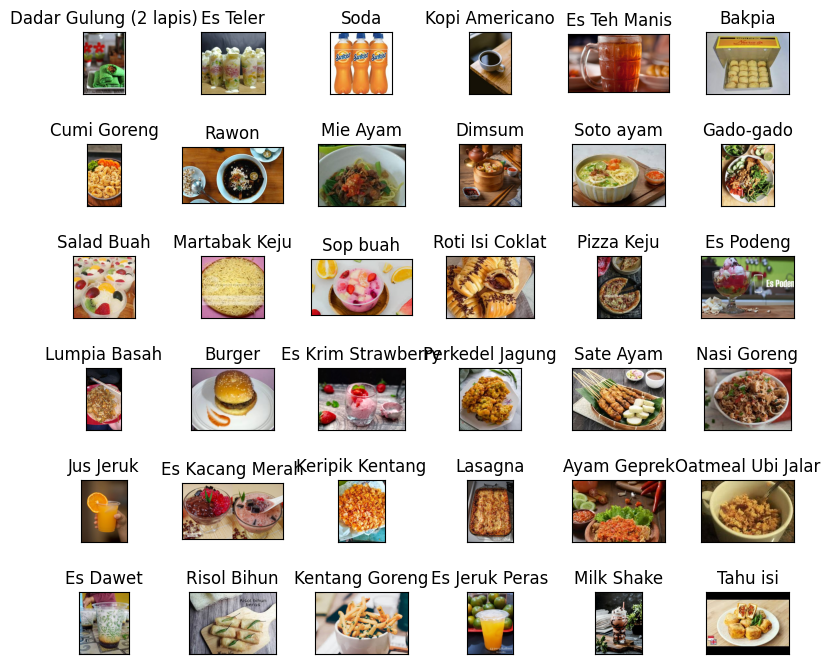

In [12]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=2)
plt.show()

In [13]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [14]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 8766 validated image filenames belonging to 109 classes.


In [15]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 1085 validated image filenames belonging to 109 classes.


In [16]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1085 validated image filenames belonging to 109 classes.


In [17]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [18]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(109, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


/home/dafahan/code/py/foodrecognition/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-05-12 13:58:10.771493: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.
2024-05-12 13:58:10.858382: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156905472 exceeds 10% of free system memory.


  1/274 ━━━━━━━━━━━━━━━━━━━━ 16:18 4s/step - accuracy: 0.0000e+00 - loss: 4.7742

2024-05-12 13:58:11.318486: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.
2024-05-12 13:58:11.410680: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 156905472 exceeds 10% of free system memory.


  2/274 ━━━━━━━━━━━━━━━━━━━━ 2:23 529ms/step - accuracy: 0.0078 - loss: 4.7692  

2024-05-12 13:58:11.843801: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 154140672 exceeds 10% of free system memory.


274/274 ━━━━━━━━━━━━━━━━━━━━ 160s 572ms/step - accuracy: 0.1557 - loss: 3.7871 - val_accuracy: 0.4590 - val_loss: 1.8974
Epoch 2/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 157s 573ms/step - accuracy: 0.6100 - loss: 1.3422 - val_accuracy: 0.5419 - val_loss: 1.6986
Epoch 3/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 160s 584ms/step - accuracy: 0.7320 - loss: 0.9231 - val_accuracy: 0.5926 - val_loss: 1.5021
Epoch 4/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 162s 589ms/step - accuracy: 0.8077 - loss: 0.6757 - val_accuracy: 0.6166 - val_loss: 1.4434
Epoch 5/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 162s 591ms/step - accuracy: 0.8584 - loss: 0.4786 - val_accuracy: 0.6138 - val_loss: 1.5269


In [19]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 530ms/step


['Es Teh Manis',
 'Tahu isi',
 'Dimsum',
 'Nasi Merah',
 'Nasi Goreng Ayam',
 'Bakpia',
 'Gado-gado',
 'Sup ayam',
 'Es Kacang Merah',
 'Martabak Keju',
 'Es Teler',
 'Es Krim Vanila',
 'Risol Mayo',
 'Kue Bolu Coklat',
 'Keripik Kentang',
 'Jus Alpukat',
 'Es Krim Coklat',
 'Mie Goreng',
 'Kopi Americano',
 'Kari Ayam',
 'Ikan Gurame Asam Manis',
 'Tempe orek',
 'Es Krim Vanila',
 'Es Jeruk Peras',
 'Burger',
 'Gado-gado',
 'Udang lapis tepung',
 'Lasagna',
 'Nasi Hainan',
 'Sandwich Keju',
 'Risol Mayo',
 'Empal Gentong',
 'Spaghetti',
 'Nasi Goreng',
 'Tumis kangkung',
 'Es Krim Coklat',
 'Puding Coklat',
 'Rendang',
 'Kue Cubit',
 'Sop buah',
 'Chicken Katsu',
 'Milk Shake',
 'Ikan Gurame Asam Manis',
 'Es Teh Manis',
 'Nasi Uduk',
 'Bubur Ayam',
 'Serabi',
 'Kue Bolu Coklat',
 'Nasi Merah',
 'Es Kelapa Muda',
 'Salad Buah',
 'Es Krim Strawberry',
 'Soda',
 'Cilok',
 'Sandwich Keju',
 'Susu coklat',
 'Perkedel Jagung',
 'Udang goreng',
 'Belgian Waffle',
 'Belgian Waffle',
 'Kue Lu

In [26]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [32]:
img = output('../../../Downloads/raw-data-makanan/makanan/Ayam Geprek/train/download (1).jpg')
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


'Ayam Geprek'

In [22]:
model.save('IndonesianFoodDaf.h5')

In [33]:
# Get the class indices from train_images
class_indices = train_images.class_indices

# Invert the class indices dictionary to get labels
labels = {v: k for k, v in class_indices.items()}

# Print the labels
print("Labels:", labels)


Labels: {0: 'Air Putih', 1: 'Ayam (Dilapisi Tepung Roti dan Digoreng)', 2: 'Ayam Geprek', 3: 'Bakpia', 4: 'Bakso Daging Sapi', 5: 'Belgian Waffle', 6: 'Brownies', 7: 'Bubur Ayam', 8: 'Burger', 9: 'Cappucino', 10: 'Cendol', 11: 'Chicken Katsu', 12: 'Cilok', 13: 'Cumi Goreng', 14: 'Dadar Gulung (2 lapis)', 15: 'Dimsum', 16: 'Donat (Glazed)', 17: 'Empal Gentong', 18: 'Es Campur', 19: 'Es Dawet', 20: 'Es Doger', 21: 'Es Jeruk Peras', 22: 'Es Kacang Merah', 23: 'Es Kelapa Muda', 24: 'Es Kopi', 25: 'Es Krim Coklat', 26: 'Es Krim Strawberry', 27: 'Es Krim Vanila', 28: 'Es Loli', 29: 'Es Podeng', 30: 'Es Semangka', 31: 'Es Teh Manis', 32: 'Es Teler', 33: 'Gado-gado', 34: 'Gelato', 35: 'Greek Yoghurt dengan Buah & Granola', 36: 'Ikan Bandeng Goreng', 37: 'Ikan Gurame Asam Manis', 38: 'Jus Alpukat', 39: 'Jus Apel', 40: 'Jus Jeruk', 41: 'Kari Ayam', 42: 'Kentang Goreng', 43: 'Keripik Kentang', 44: 'Kerupuk Udang', 45: 'Klepon', 46: 'Kopi Americano', 47: 'Kopi Latte', 48: 'Kue Apem', 49: 'Kue Bolu